In [52]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [13]:
df = pd.read_csv("data/original/dataset.csv")
df.head()

C:\Users\Olena\AppData\Local\Temp\ipykernel_32268\2122640867.py:1: DtypeWarning: Columns (9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/original/dataset.csv")


,SessionID,Start,End,kWh,Revenue,City,Station,PortNum,PortType,Adapter,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type,ChargingTime
0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,Київ,209,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,25.80
1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,Київ,111,1,CHAdeMO,False,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,1.70
2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,Стрый,147,1,Type 2,False,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,SLOW,55.02
3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,Київ,111,1,CHAdeMO,False,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,24.78
4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,Київ,209,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,23.03


# EDA

In [14]:
print(df['kWh'].describe())

count    372187.000000
mean          8.171009
std          14.269730
min           0.000000
25%           0.000000
50%           0.000000
75%          10.820000
max         111.708000
Name: kWh, dtype: float64


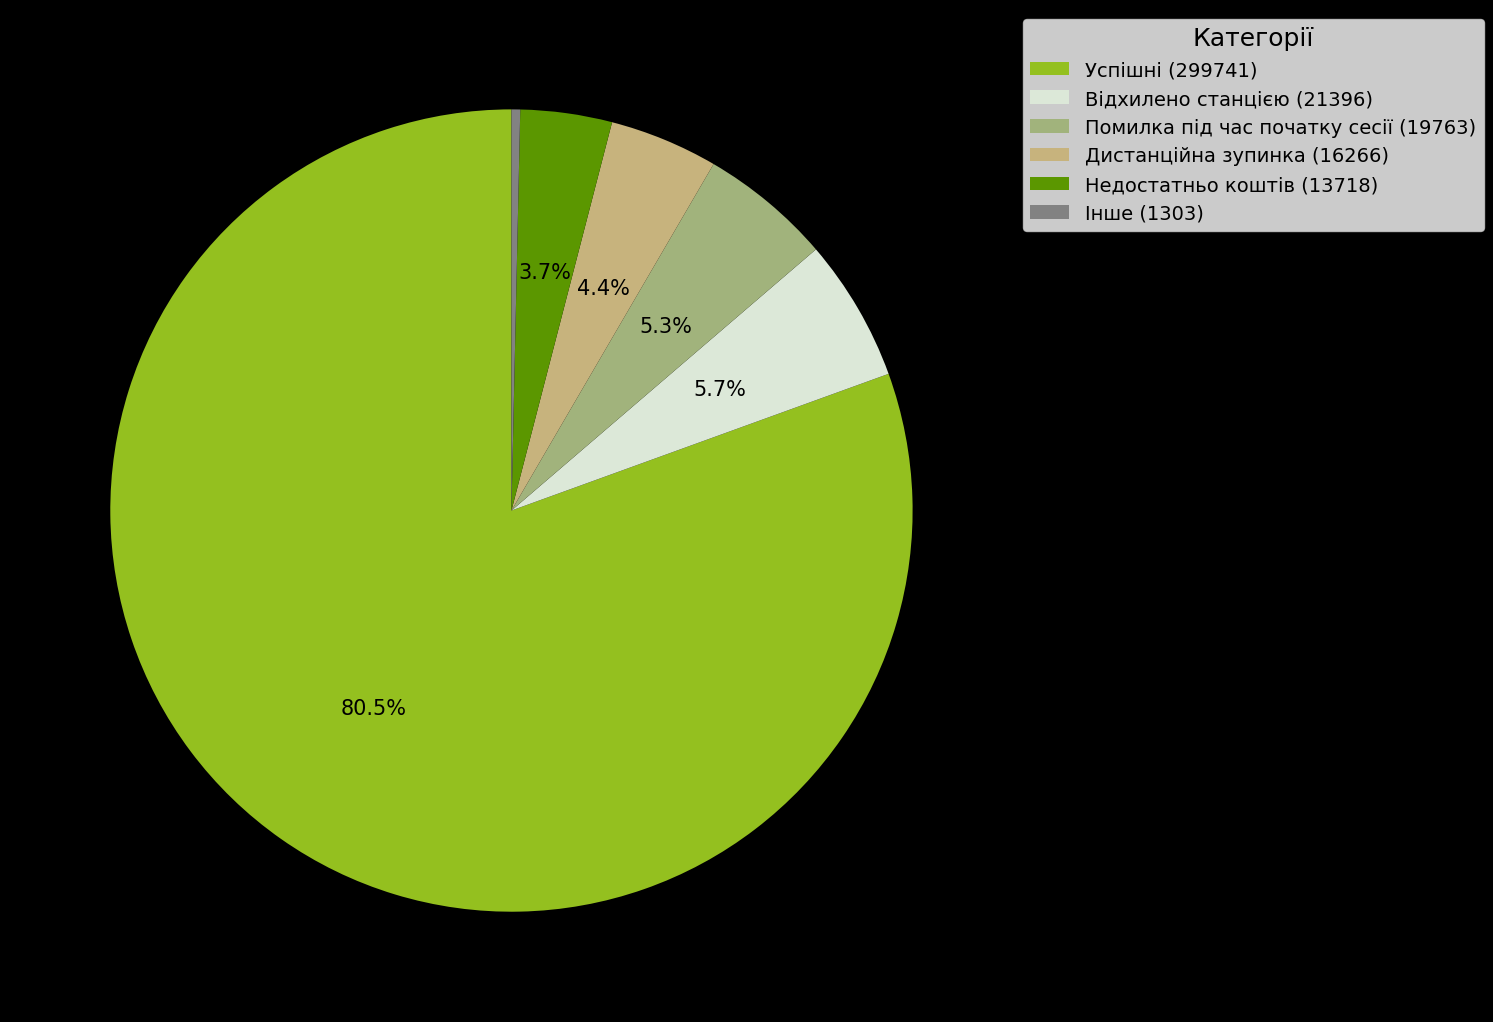

In [20]:
df['DisconnectionReason'] = df['DisconnectionReason'].fillna('Successful')
counts = df['DisconnectionReason'].value_counts()
counts = counts.rename(index={'Successful': 'Успішні'})

top_4_counts = counts.head(5)
other_count = counts[5:].sum()
counts_for_pie = pd.concat([top_4_counts, pd.Series({'Інше': other_count})])

def autopct_func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    if absolute == other_count:
        return ''  
    return f"{pct:.1f}%"

plt.figure(figsize=(15, 15), facecolor='black')
wedges, texts, autotexts = plt.pie(
    counts_for_pie, 
    autopct=lambda pct: autopct_func(pct, counts_for_pie.values), 
    startangle=90, 
    colors=['#94C01F', '#DCE8D8', '#A1B37C', '#C7B37D', '#5B9700', '#828282'],
    labels=[None] * len(counts_for_pie)
)

for autotext in autotexts:
    autotext.set_fontsize(15)

plt.legend(
    wedges, 
    [f"{label} ({value})" for label, value in zip(counts_for_pie.index, counts_for_pie.values)], 
    title="Категорії", 
    title_fontsize=18,
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=14
)

plt.tight_layout()
plt.show()


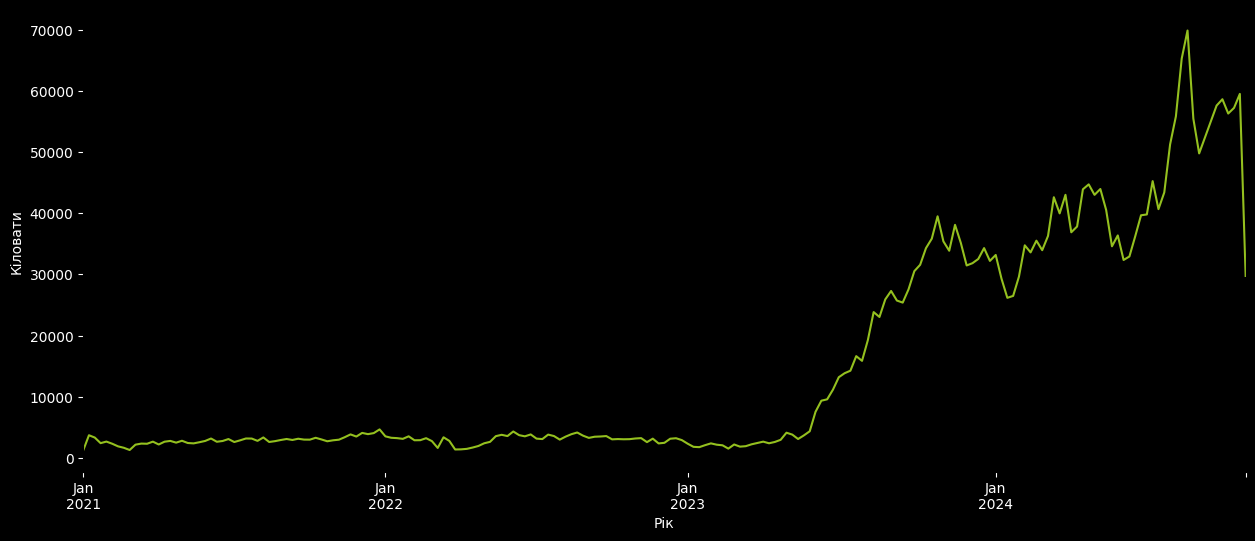

In [38]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Date'] = pd.to_datetime(df['Start'].dt.date)

weekly_kWh = df.resample('W', on='Date')['kWh'].sum()

plt.figure(figsize=(15, 6))
ax = weekly_kWh.plot(kind='line', color='#94C01F')

ax.set_facecolor('black')
plt.gca().figure.set_facecolor('black')
plt.xlabel('Рік', color='white')
plt.ylabel('Кіловати', color='white')

plt.gca().tick_params(colors='white')

plt.show()


In [41]:
weekly_revenue = df.resample('W', on='Date')['Revenue'].sum()

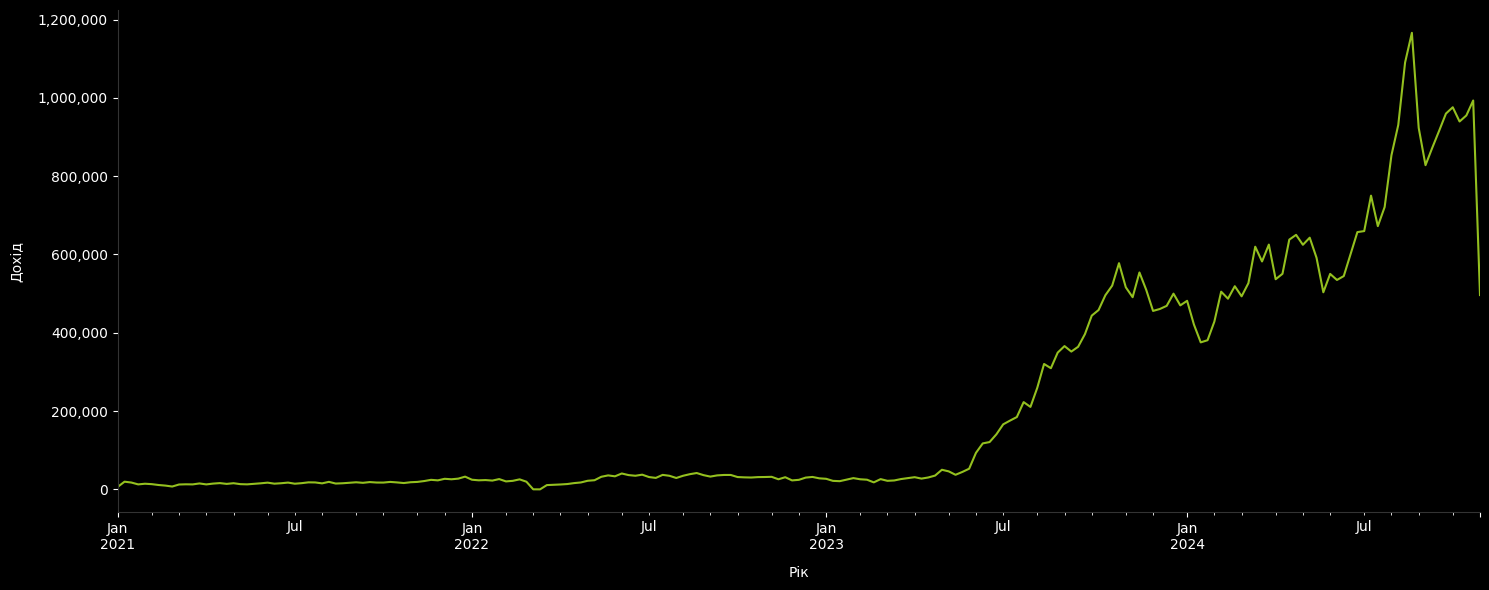

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))

plt.rcParams['axes.formatter.useoffset'] = False
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

weekly_revenue.plot(kind='line', color='#94C01F', linewidth=1.5)

plt.xlabel('Рік', labelpad=10)
plt.ylabel('Дохід', labelpad=10)

def format_func(value, tick_number):
    return f"{int(value):,}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')

plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)

plt.tight_layout()

plt.show()

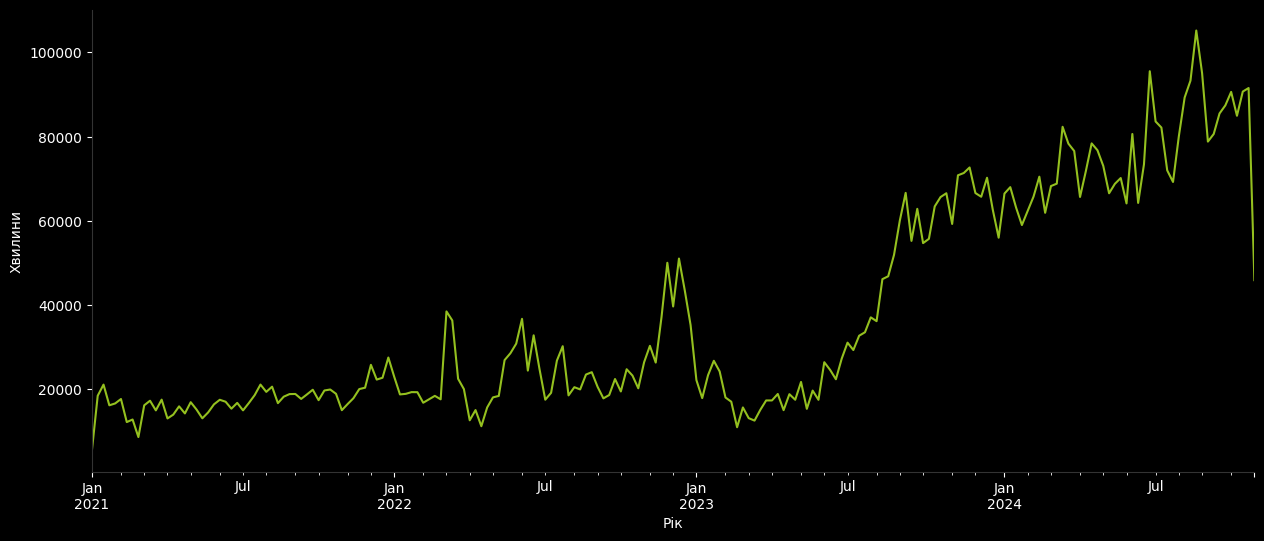

In [58]:
weekly_charging_time = df.resample('W', on='Date')['ChargingTime'].sum()
plt.figure(figsize=(15, 6))
weekly_charging_time.plot(kind='line', color='#94C01F')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.xlabel('Рік')
plt.ylabel('Хвилини')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)
plt.show()